needed libraries

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
import requests
import pandas as pd
from urllib.parse import urlparse
import numpy as np
%matplotlib inline

Variable initialisation

In [4]:
#Variable initialisation

## webscrapping variables
links = []
url = 'https://www.landeskraftwerke.bayern/standorte.htm'
domain_url = urlparse(url).netloc

## data variables
location = []
inst_power = []
yearly_prod_power = []
construction_year = []



SCRAPE DATA FROM THE WEBPAGE

In [5]:
# open and prepare the web page for scrapping 
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

#extract the links from the drop menu
content = soup.findAll('ul',attrs={"class":"submenu konventionelle-wasserkrafwerke"})
for item in content:
    for link in item.findAll('a'):
        href = link.get('href')
        links.append('https://' + domain_url + '/' + href)
        location.append(href.replace('.htm',''))

# get data from the submenu url links        
for link in links:
    soup_1 = BeautifulSoup(requests.get(link).text, 'html.parser')
    content_1 = soup_1.findAll('table', attrs={"class":"tablenormal"})

    #temp values
    i = 0

    for data in content_1[0].findAll('td', attrs={"class":"col0"}):
        
        if data.find('strong') is None:
            pass
        else:
                
        # construction year: 
            if 'Inbetriebnahme' in (data.find('strong').text):
                    construction_year.append(content_1[0].findAll('td', attrs={"class":"col1"})[i].text)
        # installed power: 
            elif 'Installierte Leistung' in (data.find('strong').text):
                inst_power.append(content_1[0].findAll('td', attrs={"class":"col1"})[i].text)
        
        # yearly produced power:
            elif 'Mittlere Jahresarbeit' in (data.find('strong').text):
                yearly_prod_power.append(content_1[0].findAll('td', attrs={"class":"col1"})[i].text)
        
        i += 1


In [6]:
print(yearly_prod_power)
print(len(yearly_prod_power))

['1,2 Mio. kWh', '0,5 Mio. kWh', '2,9 Mio. kWh', '0,3 Mio. kWh', '3,6 Mio. kWh', '8,1 Mio. kWh', '3,3 Mio. kWh', '0,4 Mio. kWh', '1,1 Mio. kWh', '0,9 Mio. kWh', '2,9 Mio. kWh', '2,3 Mio. kWh', '1,4 Mio. kWh', '0,3 Mio. kWh', '0,8 Mio. kWh', '8,7 Mio. kWh', '16,4 Mio. kWh', '0,1 Mio. kWh']
18


In [7]:
print(construction_year)
print(len(construction_year))

['1996', '2008', '1976', '1991', '1982', '1993', '2013', '1967', '1973', '1972', '1994', '2013', '1990', '1967', '1968', '1959, Sanierung 2003', '2000', '1964']
18


In [8]:
print (inst_power)
print(len(inst_power))


['615 kW', '130 kW', '1.300 KW', '150 kW', '600 kW', '3.300 kW', '1.093 kW', '160 KW', '420 kW', '300 kW', '765 kW', '848 kW', '450 kW', '90 kW', '250 kW', '2.508 kW', '3.780 kW', '40 kW']
18


In [9]:
print(location)

print(len(location))

['brombachsee', 'drachensee', 'eixendorf', 'foermitz', 'frauenau', 'hilpoltstein', 'leerstetten', 'liebenstein', 'mauthaus', 'postmuenster', 'rothsee1', 'rothsee2', 'rottachsee', 'silbersee', 'surspeicher', 'sylvenstein1', 'sylvenstein2', 'windach']
18


In [10]:
data = {'installed power': inst_power,
        'construction year': construction_year,
        'yearly produced power': yearly_prod_power}

df = pd.DataFrame(data, index=location)

In [11]:
df

,installed power,construction year,yearly produced power
brombachsee,615 kW,1996,"1,2 Mio. kWh"
drachensee,130 kW,2008,"0,5 Mio. kWh"
eixendorf,1.300 KW,1976,"2,9 Mio. kWh"
foermitz,150 kW,1991,"0,3 Mio. kWh"
frauenau,600 kW,1982,"3,6 Mio. kWh"
hilpoltstein,3.300 kW,1993,"8,1 Mio. kWh"
leerstetten,1.093 kW,2013,"3,3 Mio. kWh"
liebenstein,160 KW,1967,"0,4 Mio. kWh"
mauthaus,420 kW,1973,"1,1 Mio. kWh"
postmuenster,300 kW,1972,"0,9 Mio. kWh"


In [12]:
df.iat[7,0].lower()

'160 kw'

In [23]:
df['installed power'] = df['installed power'].apply(lambda x : x.lower().replace(' kw', ''))
df['installed power'] = df['installed power'].apply(lambda x : int(x.replace('.', '')))

df['yearly produced power'] = df['yearly produced power'].apply(lambda x : x.lower().replace(' mio. kwh', ''))
df['yearly produced power'] = df['yearly produced power'].apply(lambda x : float(x.replace(',','.'))*10E6)

AttributeError: 'float' object has no attribute 'lower'

In [14]:
df

,installed power,construction year,yearly produced power
brombachsee,615 kW,1996,12000000.0
drachensee,130 kW,2008,5000000.0
eixendorf,1.300 KW,1976,29000000.0
foermitz,150 kW,1991,3000000.0
frauenau,600 kW,1982,36000000.0
hilpoltstein,3.300 kW,1993,81000000.0
leerstetten,1.093 kW,2013,33000000.0
liebenstein,160 KW,1967,4000000.0
mauthaus,420 kW,1973,11000000.0
postmuenster,300 kW,1972,9000000.0


In [20]:
df['construction year'] = df['construction year'].apply(lambda x : x.lower().replace(', sanierung 2003', ''))
df['construction year'] = df['construction year'].apply(lambda x : int(x))

AttributeError: 'int' object has no attribute 'lower'

In [24]:
df

,installed power,construction year,yearly produced power
brombachsee,615,1996,12000000.0
drachensee,130,2008,5000000.0
eixendorf,1300,1976,29000000.0
foermitz,150,1991,3000000.0
frauenau,600,1982,36000000.0
hilpoltstein,3300,1993,81000000.0
leerstetten,1093,2013,33000000.0
liebenstein,160,1967,4000000.0
mauthaus,420,1973,11000000.0
postmuenster,300,1972,9000000.0


In [25]:
df.corr()

,installed power,construction year,yearly produced power
installed power,1.000000,0.193167,0.950854
construction year,0.193167,1.000000,0.182284
yearly produced power,0.950854,0.182284,1.000000


In [19]:
import seaborn as sns

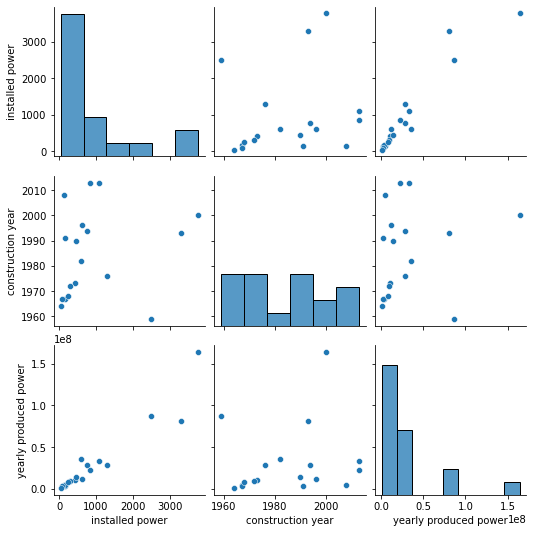

In [24]:
sns.pairplot(df)